In [12]:
from qiskit_aer import AerSimulator
from qiskit import *
import supermarq
from qiskit.providers.fake_provider import *
import numpy as np 
import os


f=5 # number of fake_backend want to choose

lower_limit= 3 # the lower limit of qubits for the circuit
upper_limit= 17 # the lower limit of qubits for the circuit
steps= 

In [2]:
all_fakes=[FakeAlmadenV2,FakeArmonkV2,FakeAthensV2,FakeAuckland,FakeBelemV2,FakeBoeblingenV2,FakeBogotaV2,FakeBrooklynV2,FakeBurlingtonV2,FakeCairoV2,FakeCambridgeV2,FakeCasablancaV2,FakeEssexV2,FakeGeneva,FakeGuadalupeV2,FakeHanoiV2,FakeJakartaV2,FakeJohannesburgV2,FakeKolkataV2,FakeLagosV2,FakeLimaV2,FakeLondonV2,FakeManhattanV2,FakeManilaV2,FakeMelbourneV2,FakeMontrealV2,FakeMumbaiV2,FakeNairobiV2,FakeOslo,FakeOurenseV2,FakeParisV2,FakePerth,FakePrague,FakePoughkeepsieV2,FakeQuitoV2,FakeRochesterV2,FakeRomeV2,FakeSantiagoV2,FakeSherbrooke,FakeSingaporeV2,FakeSydneyV2,FakeTorontoV2,FakeValenciaV2,FakeVigoV2,FakeWashingtonV2,FakeYorktownV2]
import random; selected_fakes = random.sample(all_fakes, f)
selected_fakes  # having any randomly selected 5 fake backends out of 46 mentioned in the inital list

[qiskit.providers.fake_provider.backends.nairobi.fake_nairobi.FakeNairobiV2,
 qiskit.providers.fake_provider.backends.geneva.fake_geneva.FakeGeneva,
 qiskit.providers.fake_provider.backends.paris.fake_paris.FakeParisV2,
 qiskit.providers.fake_provider.backends.oslo.fake_oslo.FakeOslo,
 qiskit.providers.fake_provider.backends.poughkeepsie.fake_poughkeepsie.FakePoughkeepsieV2]

In [3]:
benchmarks=[]
for i in range(lower_limit,upper_limit,2):
    label = "ghz"+str(i)
    benchmarks.append((supermarq.ghz.GHZ(i),label))
for i in benchmarks:
    circuit=i[0].qiskit_circuit()
    print("--------------------------",i[1],"---------------------------")
    print(circuit.draw())

-------------------------- ghz3 ---------------------------
     ┌───┐          ┌─┐      
q_0: ┤ H ├──■───────┤M├──────
     └───┘┌─┴─┐     └╥┘┌─┐   
q_1: ─────┤ X ├──■───╫─┤M├───
          └───┘┌─┴─┐ ║ └╥┘┌─┐
q_2: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c: 3/════════════════╩══╩══╩═
                     0  1  2 
-------------------------- ghz5 ---------------------------
     ┌───┐          ┌─┐                      
q_0: ┤ H ├──■───────┤M├──────────────────────
     └───┘┌─┴─┐     └╥┘     ┌─┐              
q_1: ─────┤ X ├──■───╫──────┤M├──────────────
          └───┘┌─┴─┐ ║      └╥┘     ┌─┐      
q_2: ──────────┤ X ├─╫───■───╫──────┤M├──────
               └───┘ ║ ┌─┴─┐ ║      └╥┘┌─┐   
q_3: ────────────────╫─┤ X ├─╫───■───╫─┤M├───
                     ║ └───┘ ║ ┌─┴─┐ ║ └╥┘┌─┐
q_4: ────────────────╫───────╫─┤ X ├─╫──╫─┤M├
                     ║       ║ └───┘ ║  ║ └╥┘
c: 5/════════════════╩═══════╩═══════╩══╩══╩═
                     0       1       2  3  4 
------------

In [4]:
benchmark_features = {}
for benchmark, label in benchmarks:
    benchmark_features[label] = [
        supermarq.converters.compute_communication_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_depth_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_entanglement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_liveness_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_measurement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_parallelism_with_qiskit(benchmark.qiskit_circuit()),]
print(benchmark_features)

{'ghz3': [0.6666666666666666, 1.0, 0.6666666666666666, 0.6666666666666666, 0.0, 0], 'ghz5': [0.4, 1.0, 0.8, 0.4666666666666667, 0.0, 0], 'ghz7': [0.2857142857142857, 1.0, 0.8571428571428571, 0.35714285714285715, 0.0, 0], 'ghz9': [0.2222222222222222, 1.0, 0.8888888888888888, 0.28888888888888886, 0.0, 0], 'ghz11': [0.18181818181818182, 1.0, 0.9090909090909091, 0.24242424242424243, 0.0, 0], 'ghz13': [0.15384615384615385, 1.0, 0.9230769230769231, 0.2087912087912088, 0.0, 0], 'ghz15': [0.13333333333333333, 1.0, 0.9333333333333333, 0.18333333333333332, 0.0, 0]}


In [5]:
jobs =[]
print("=============SCORES OF ALL THE CIRCUITS=============")    
for backend in selected_fakes:
    print("------------------------BACKEND-NAME :: ", backend().name)
    for benchmark, label in benchmarks:
        circuit=benchmark.qiskit_circuit()
        job = backend().run(circuit, shots=1000)
        result=job.result()
        counts = job.result(0).get_counts()
        score = benchmark.score(counts)
        print(label," :: ",score)
        #counts=job.result(0).count()
        jobs.append((label,benchmark,backend,job,score))
#jobs

=============SCORES OF ALL THE CIRCUITS=============
------------------------BACKEND-NAME ::  fake_nairobi
ghz3  ::  0.9196074411930251
ghz5  ::  0.8757894229488622
ghz7  ::  0.8285825160086265
ghz9  ::  0.8023049524455643
ghz11  ::  0.8040789395595814
ghz13  ::  0.81662498085758
ghz15  ::  0.8075624951179503
------------------------BACKEND-NAME ::  fake_geneva
ghz3  ::  0.9165414828375265
ghz5  ::  0.8559988317741066
ghz7  ::  0.8028352713131502
ghz9  ::  0.7588257175568246
ghz11  ::  0.7243618520927565
ghz13  ::  0.6734639653811384
ghz15  ::  0.5470329650426848
------------------------BACKEND-NAME ::  fake_paris
ghz3  ::  0.9145842373129925
ghz5  ::  0.8182664369783801
ghz7  ::  0.632569612585582
ghz9  ::  0.618951126997463
ghz11  ::  0.5898915054727754
ghz13  ::  0.5518532218408911
ghz15  ::  0.5328270114190805
------------------------BACKEND-NAME ::  fake_oslo
ghz3  ::  0.965933742867487
ghz5  ::  0.9059823396116012
ghz7  ::  0.8729928407202117
ghz9  ::  0.896999721293113
ghz11  ::

In [6]:
all_scores={}  
all_fake_names=[]
all_fake_scores=[]
for i in selected_fakes:
    fakes=i
    #print("SELCETED_FAKES:: ",i)
    i={}
    for label,benchmark,backend,job,score in jobs:
        #supermarq.plotting.plot_results([score], [label])
        if fakes == backend:
            i[label] = score
    device_scores = 'device_score_' +str(fakes().name)
    all_scores[device_scores]= i
    all_fake_scores.append(i)
    all_fake_names.append(device_scores)   
#print(all_scores)    

USED BACKEND:: fake_nairobi ; CIRCUIT_NAME: ghz3 ; SCORE = 0.9196074411930251


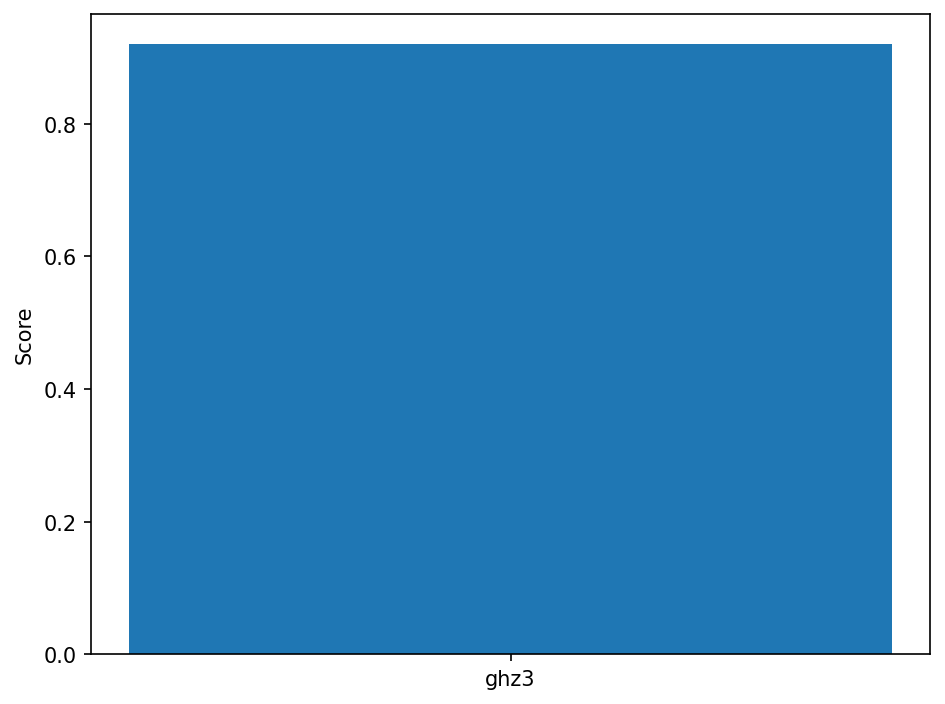

-----------------------------------------------------------
USED BACKEND:: fake_nairobi ; CIRCUIT_NAME: ghz5 ; SCORE = 0.8757894229488622


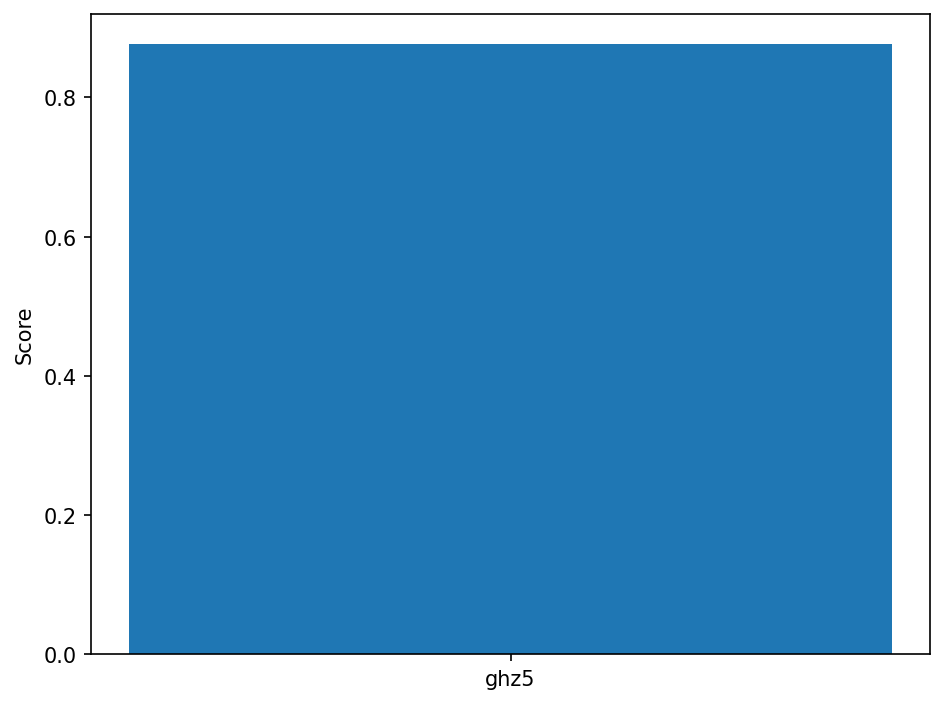

-----------------------------------------------------------
USED BACKEND:: fake_nairobi ; CIRCUIT_NAME: ghz7 ; SCORE = 0.8285825160086265


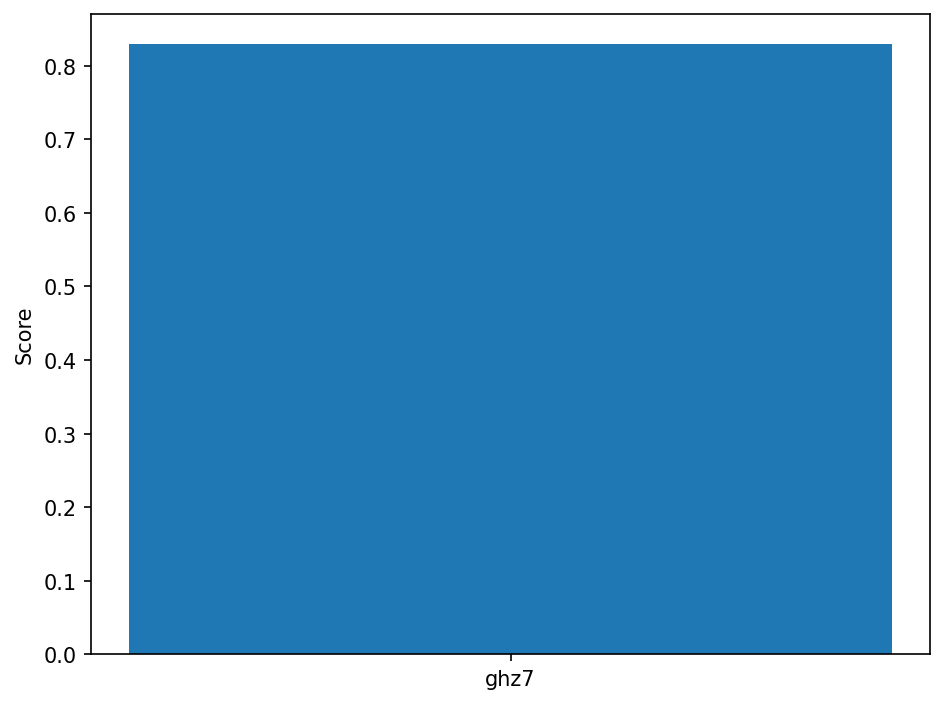

-----------------------------------------------------------
USED BACKEND:: fake_nairobi ; CIRCUIT_NAME: ghz9 ; SCORE = 0.8023049524455643


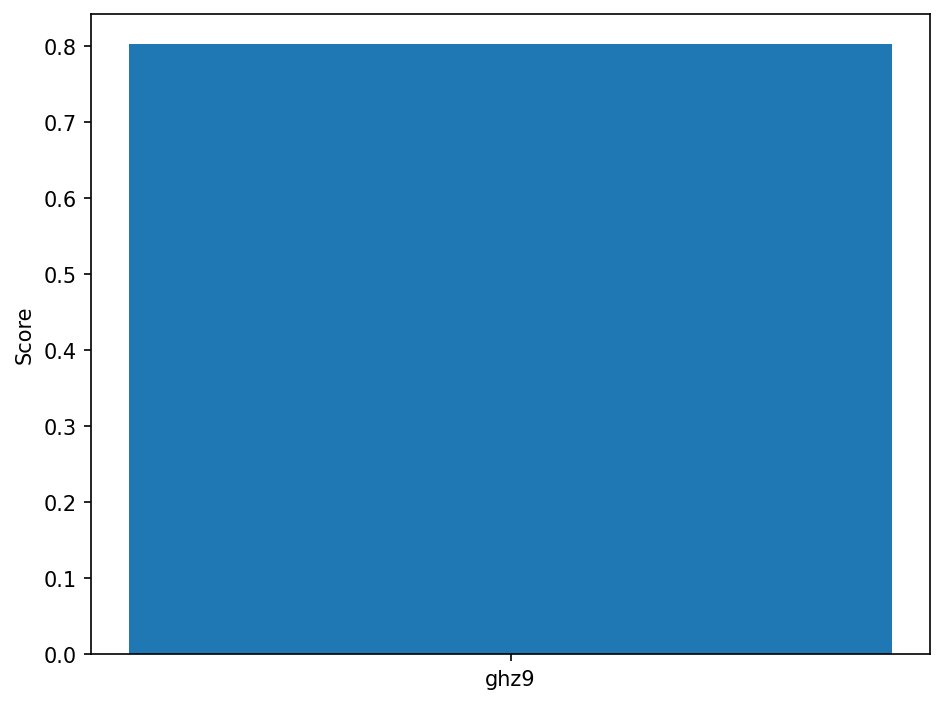

-----------------------------------------------------------
USED BACKEND:: fake_nairobi ; CIRCUIT_NAME: ghz11 ; SCORE = 0.8040789395595814


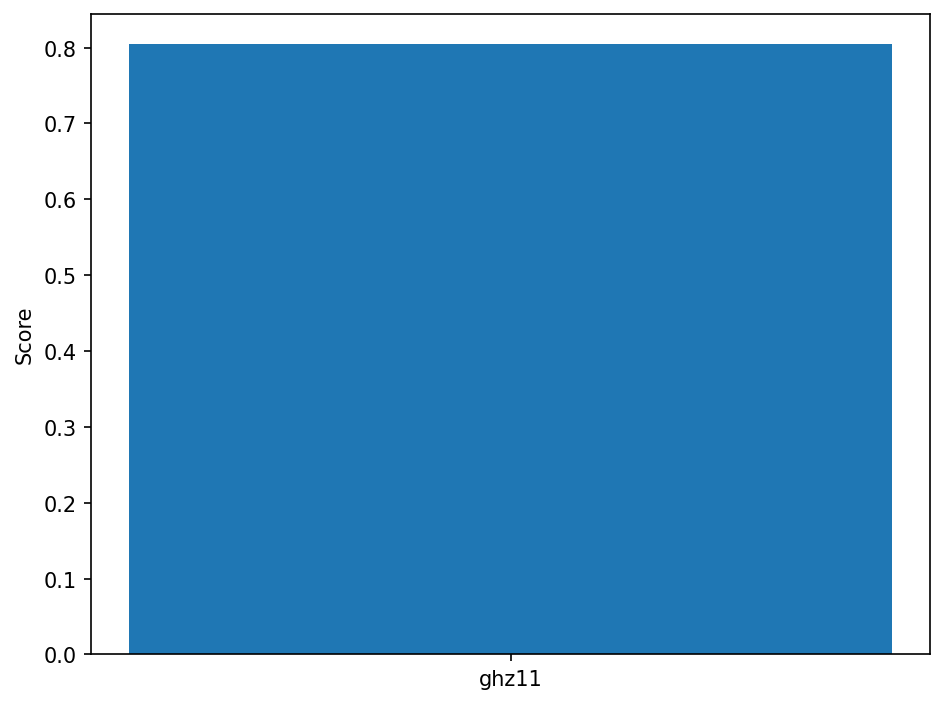

-----------------------------------------------------------
USED BACKEND:: fake_nairobi ; CIRCUIT_NAME: ghz13 ; SCORE = 0.81662498085758


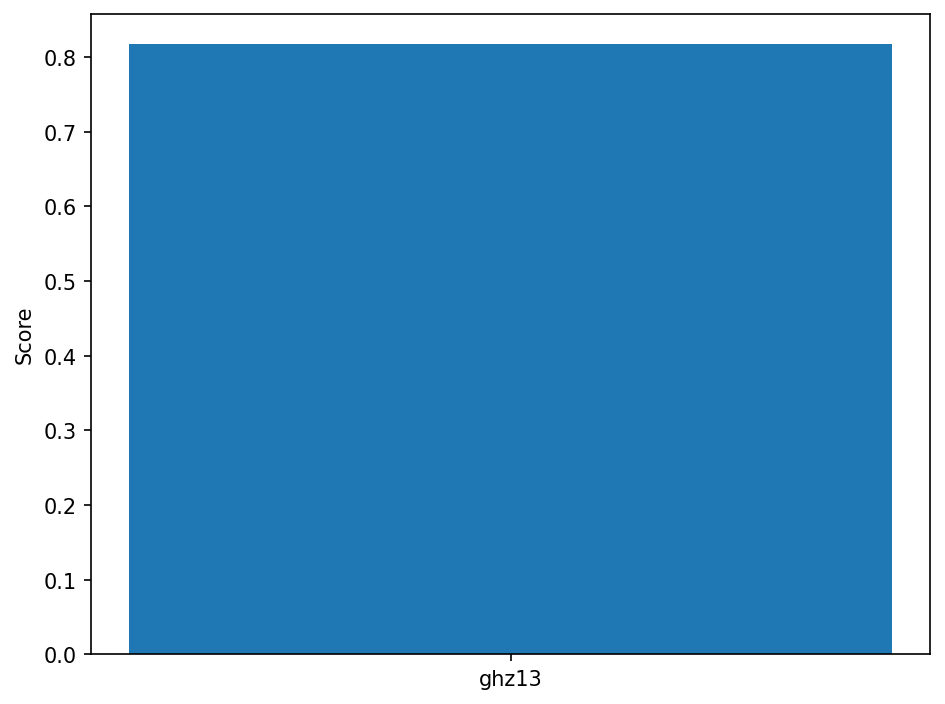

-----------------------------------------------------------
USED BACKEND:: fake_nairobi ; CIRCUIT_NAME: ghz15 ; SCORE = 0.8075624951179503


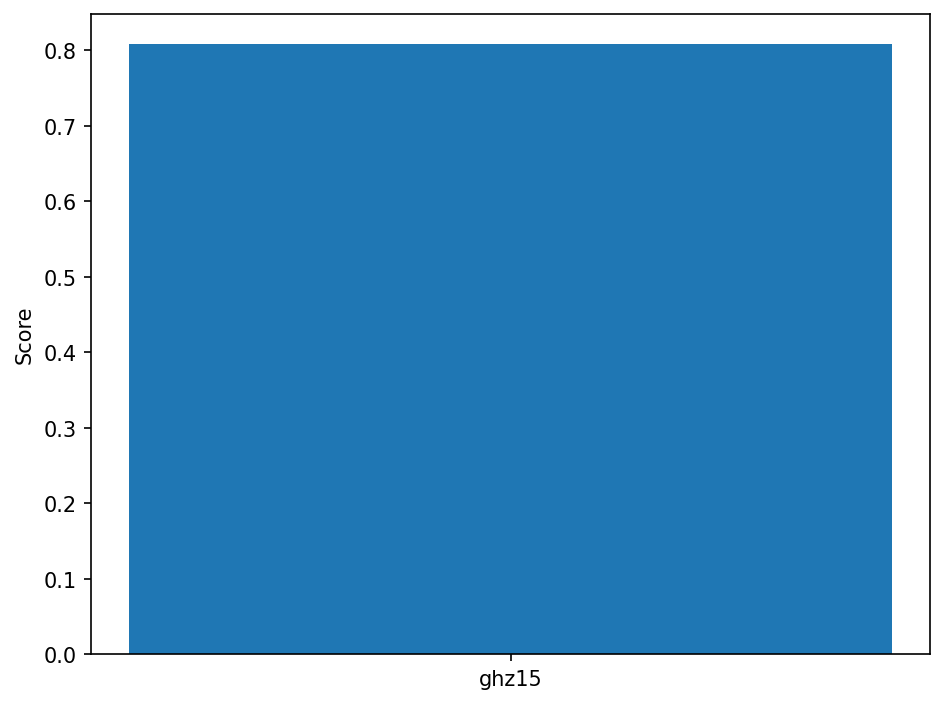

-----------------------------------------------------------
USED BACKEND:: fake_geneva ; CIRCUIT_NAME: ghz3 ; SCORE = 0.9165414828375265


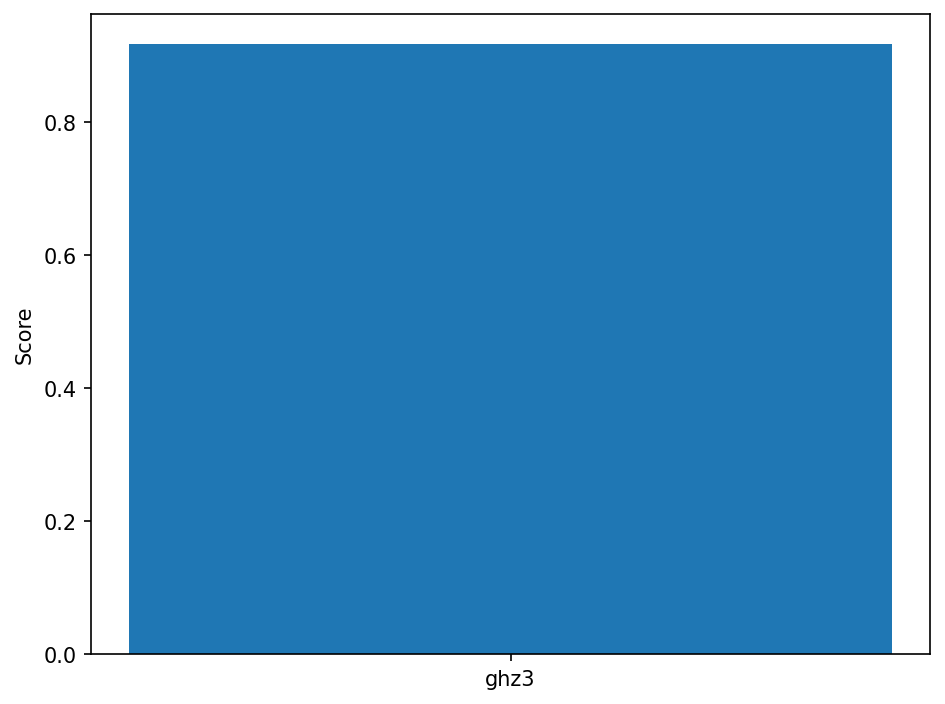

-----------------------------------------------------------
USED BACKEND:: fake_geneva ; CIRCUIT_NAME: ghz5 ; SCORE = 0.8559988317741066


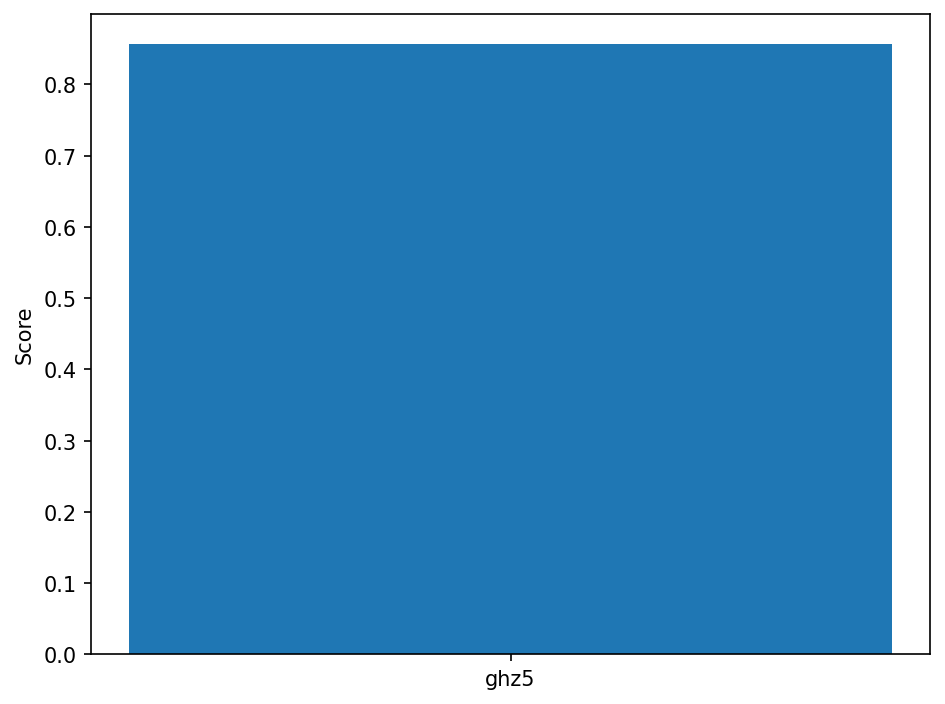

-----------------------------------------------------------
USED BACKEND:: fake_geneva ; CIRCUIT_NAME: ghz7 ; SCORE = 0.8028352713131502


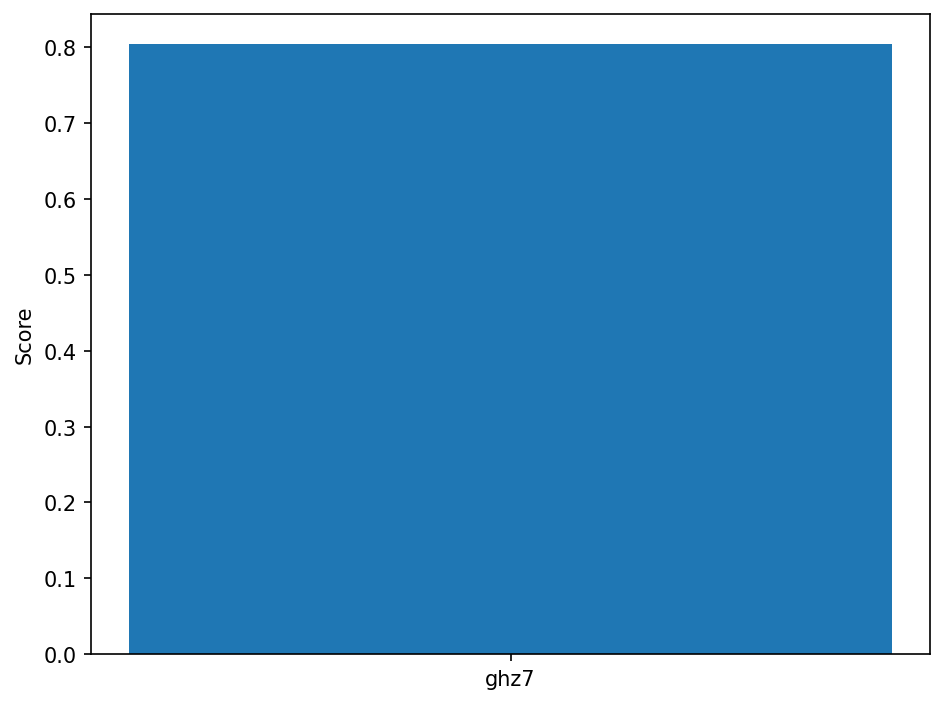

-----------------------------------------------------------
USED BACKEND:: fake_geneva ; CIRCUIT_NAME: ghz9 ; SCORE = 0.7588257175568246


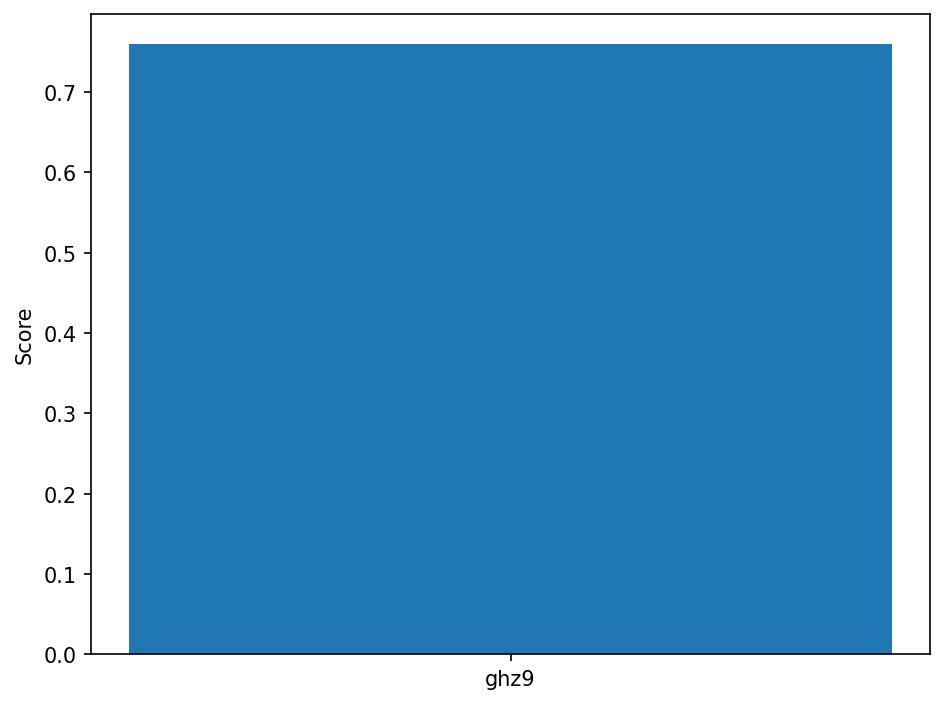

-----------------------------------------------------------
USED BACKEND:: fake_geneva ; CIRCUIT_NAME: ghz11 ; SCORE = 0.7243618520927565


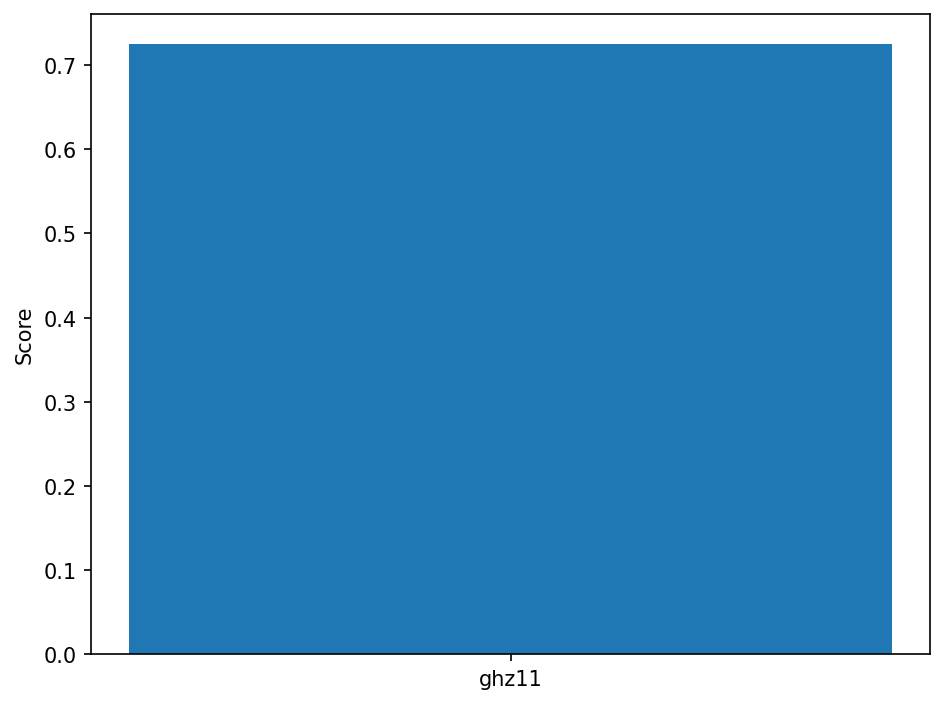

-----------------------------------------------------------
USED BACKEND:: fake_geneva ; CIRCUIT_NAME: ghz13 ; SCORE = 0.6734639653811384


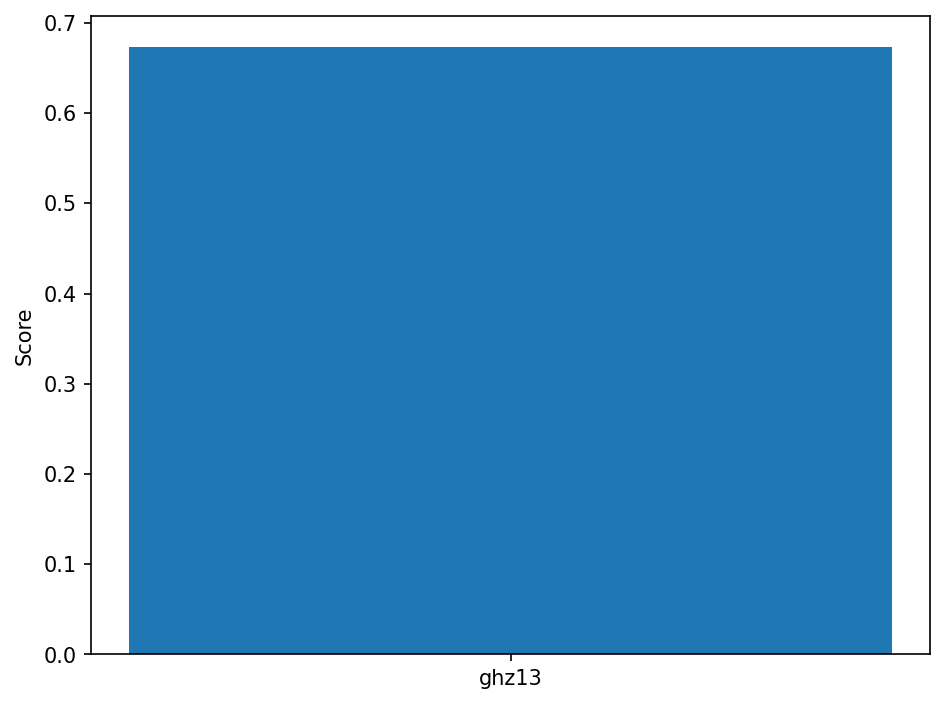

-----------------------------------------------------------
USED BACKEND:: fake_geneva ; CIRCUIT_NAME: ghz15 ; SCORE = 0.5470329650426848


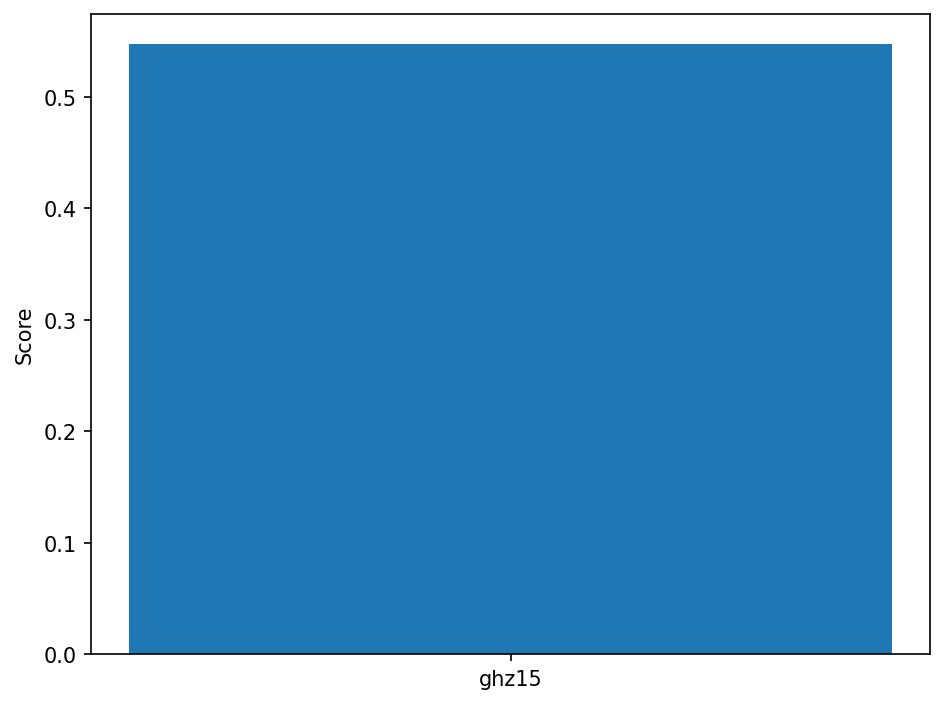

-----------------------------------------------------------
USED BACKEND:: fake_paris ; CIRCUIT_NAME: ghz3 ; SCORE = 0.9145842373129925


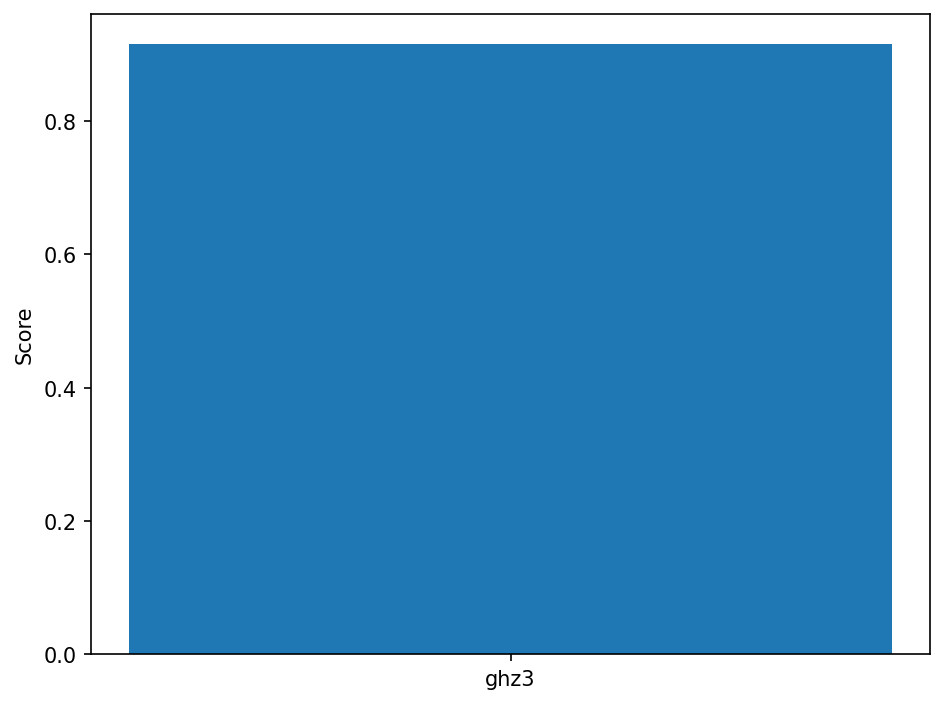

-----------------------------------------------------------
USED BACKEND:: fake_paris ; CIRCUIT_NAME: ghz5 ; SCORE = 0.8182664369783801


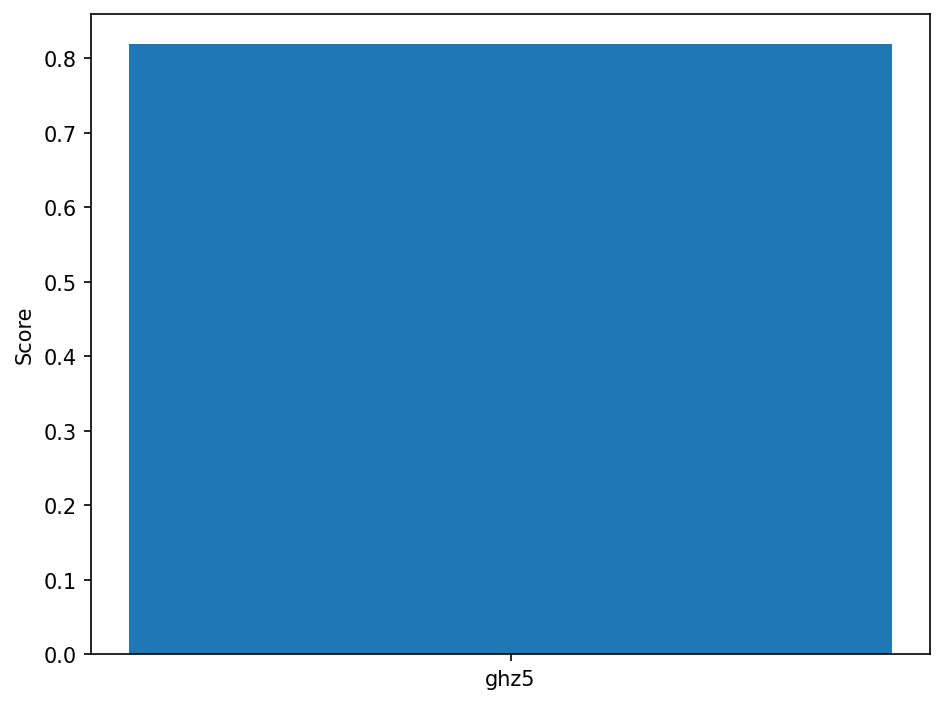

-----------------------------------------------------------
USED BACKEND:: fake_paris ; CIRCUIT_NAME: ghz7 ; SCORE = 0.632569612585582


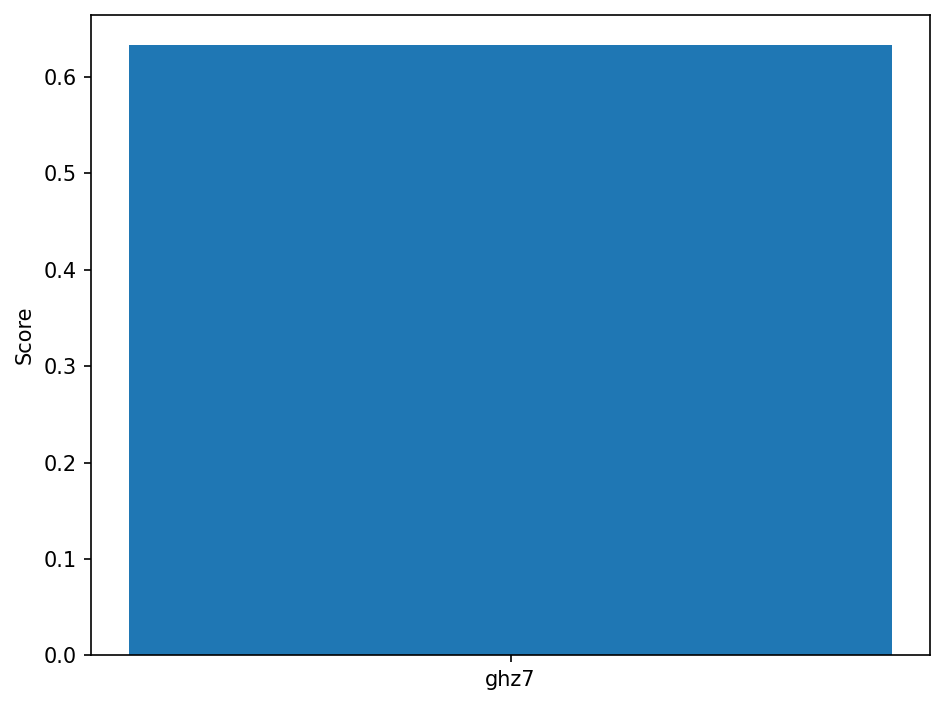

-----------------------------------------------------------
USED BACKEND:: fake_paris ; CIRCUIT_NAME: ghz9 ; SCORE = 0.618951126997463


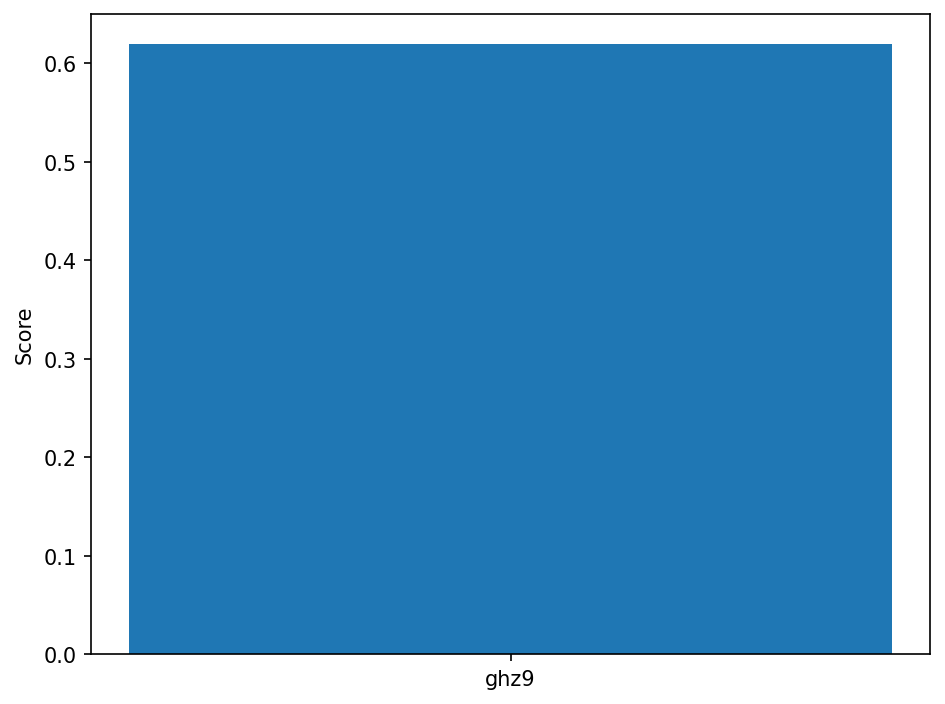

-----------------------------------------------------------
USED BACKEND:: fake_paris ; CIRCUIT_NAME: ghz11 ; SCORE = 0.5898915054727754


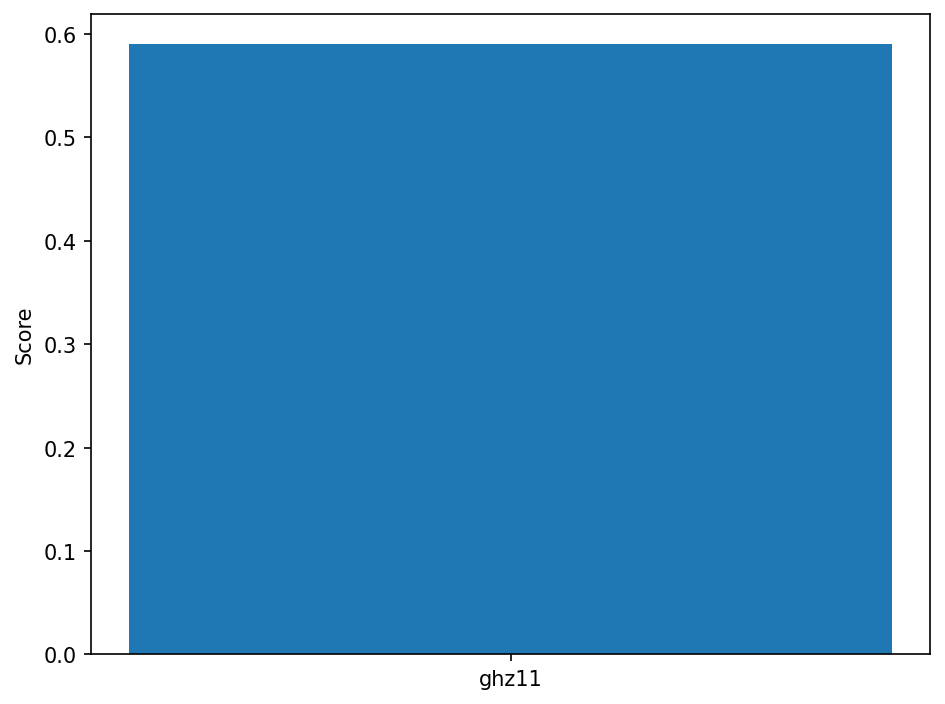

-----------------------------------------------------------
USED BACKEND:: fake_paris ; CIRCUIT_NAME: ghz13 ; SCORE = 0.5518532218408911


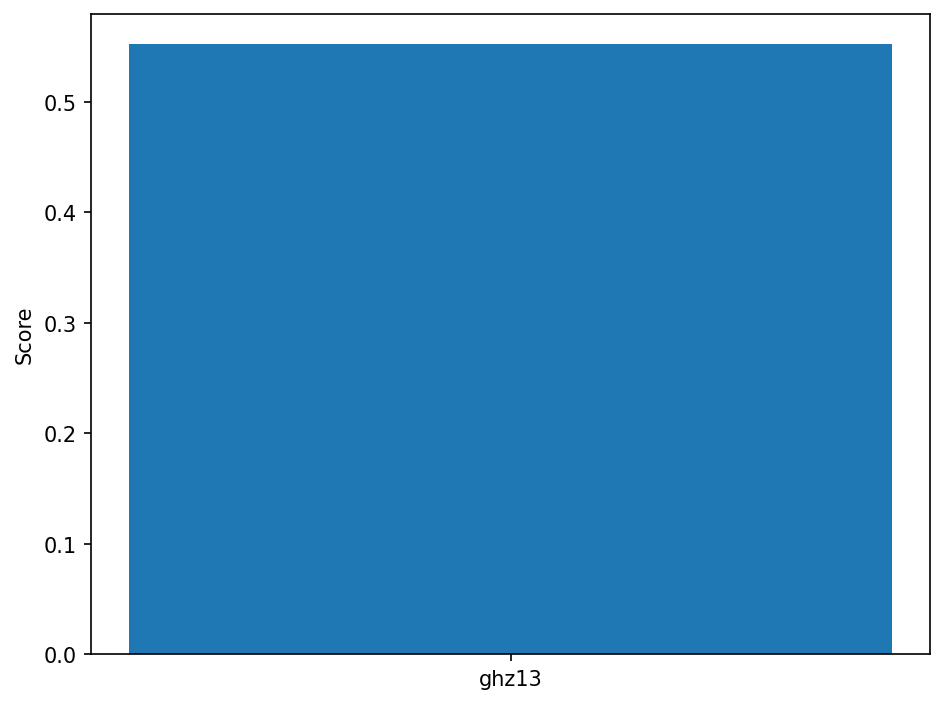

-----------------------------------------------------------
USED BACKEND:: fake_paris ; CIRCUIT_NAME: ghz15 ; SCORE = 0.5328270114190805


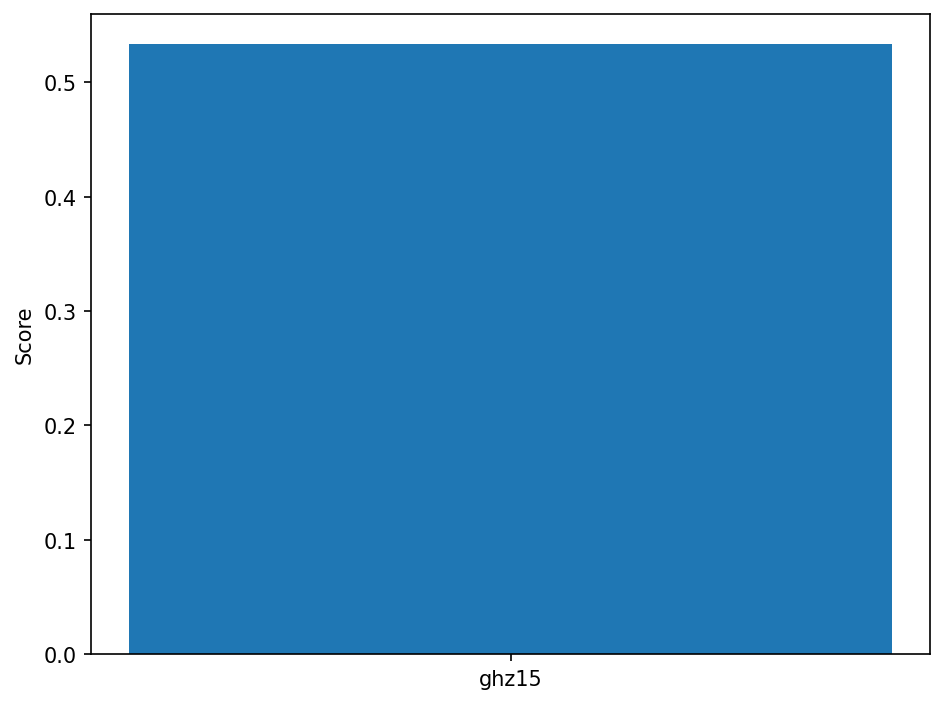

-----------------------------------------------------------
USED BACKEND:: fake_oslo ; CIRCUIT_NAME: ghz3 ; SCORE = 0.965933742867487


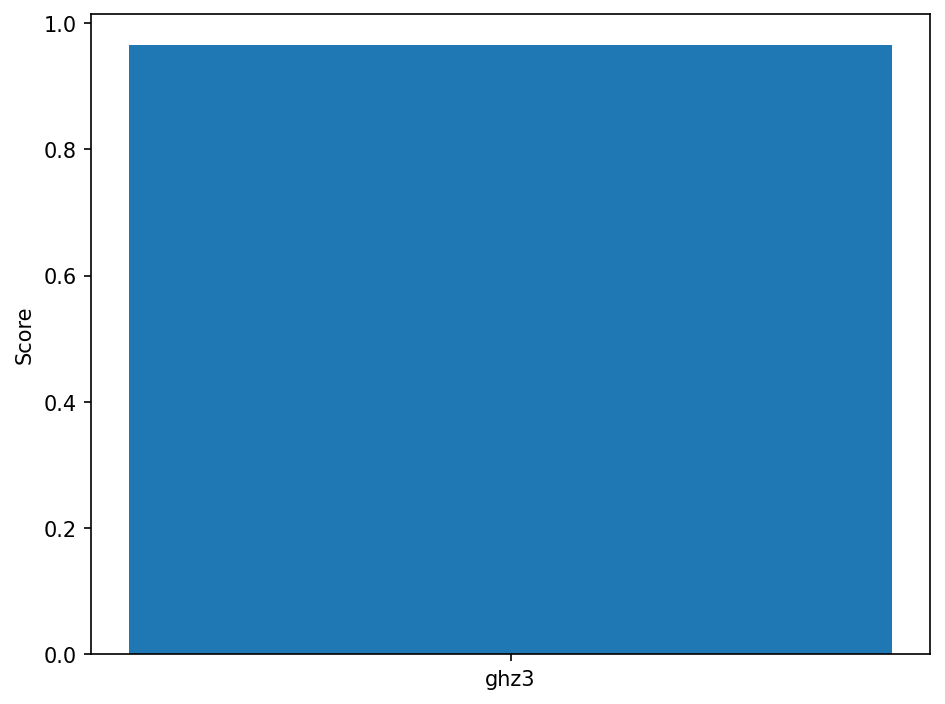

-----------------------------------------------------------
USED BACKEND:: fake_oslo ; CIRCUIT_NAME: ghz5 ; SCORE = 0.9059823396116012


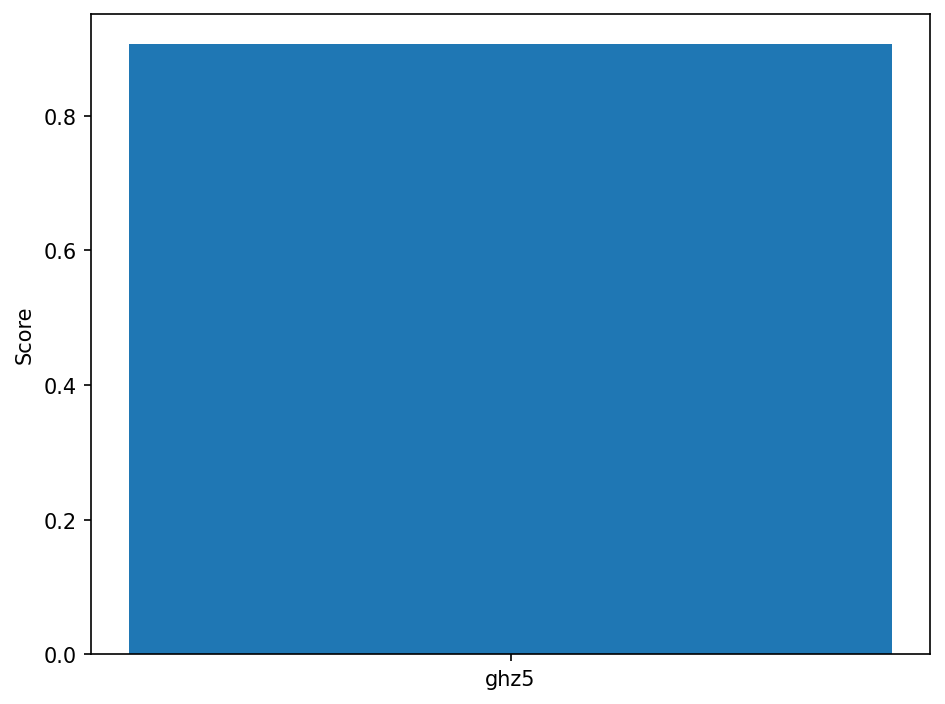

-----------------------------------------------------------
USED BACKEND:: fake_oslo ; CIRCUIT_NAME: ghz7 ; SCORE = 0.8729928407202117


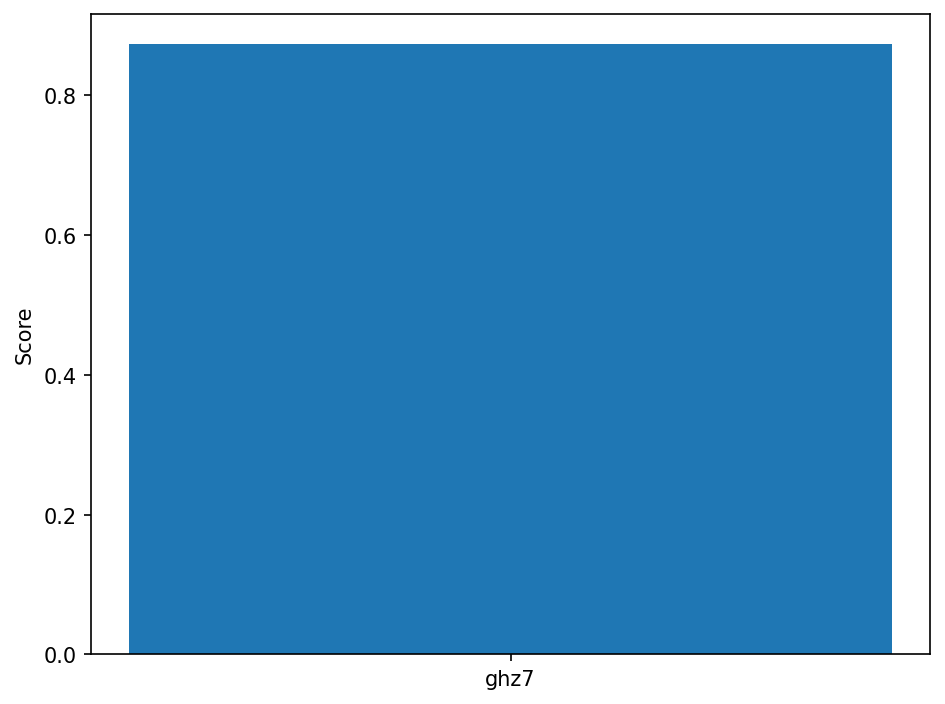

-----------------------------------------------------------
USED BACKEND:: fake_oslo ; CIRCUIT_NAME: ghz9 ; SCORE = 0.896999721293113


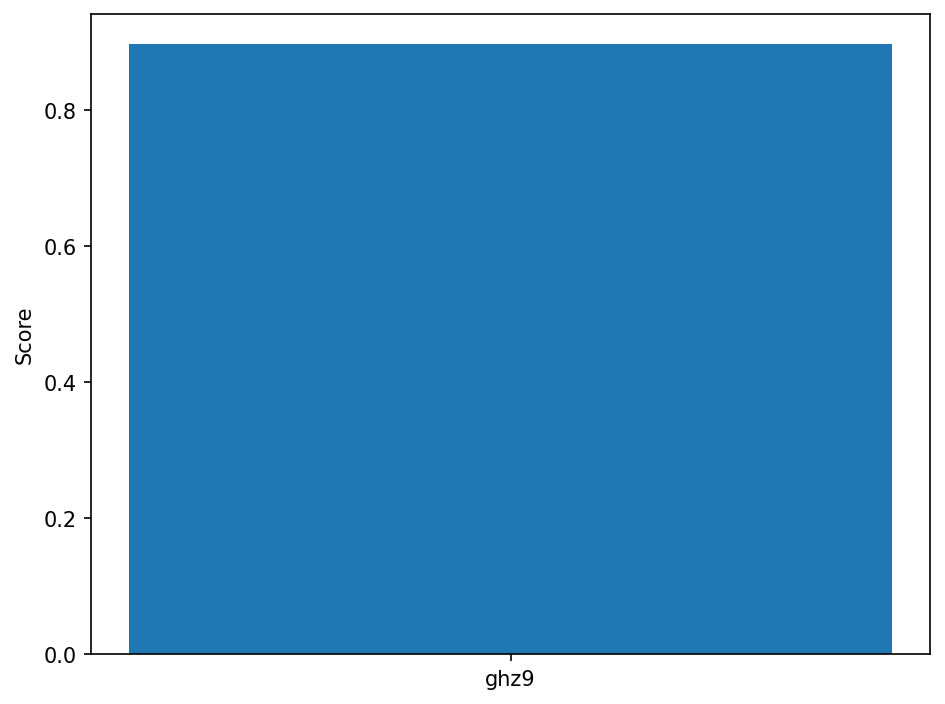

-----------------------------------------------------------
USED BACKEND:: fake_oslo ; CIRCUIT_NAME: ghz11 ; SCORE = 0.8859954853043088


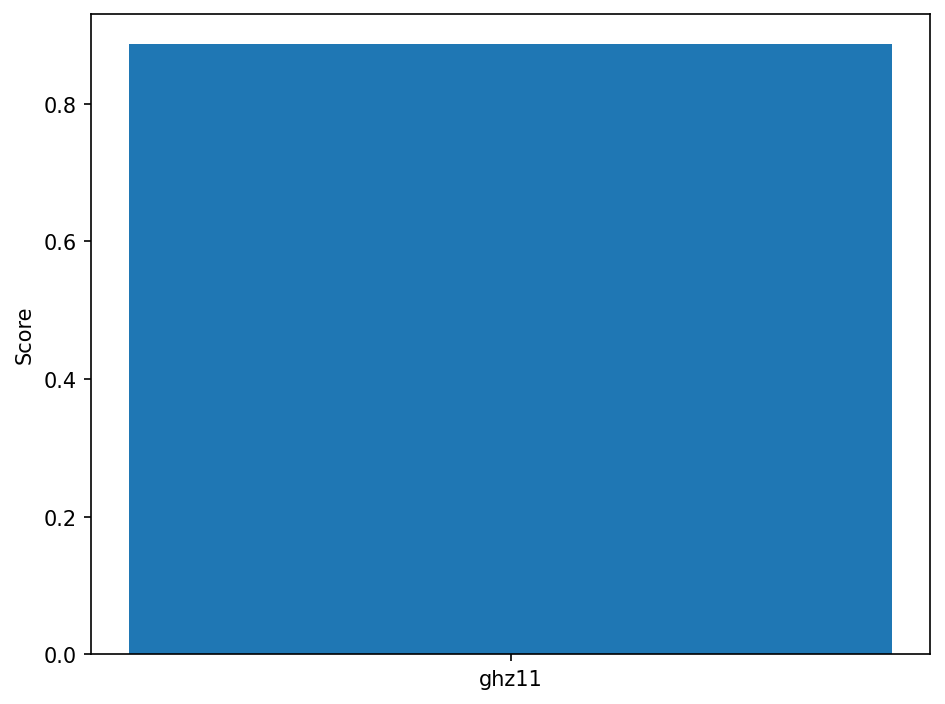

-----------------------------------------------------------
USED BACKEND:: fake_oslo ; CIRCUIT_NAME: ghz13 ; SCORE = 0.8728736930659318


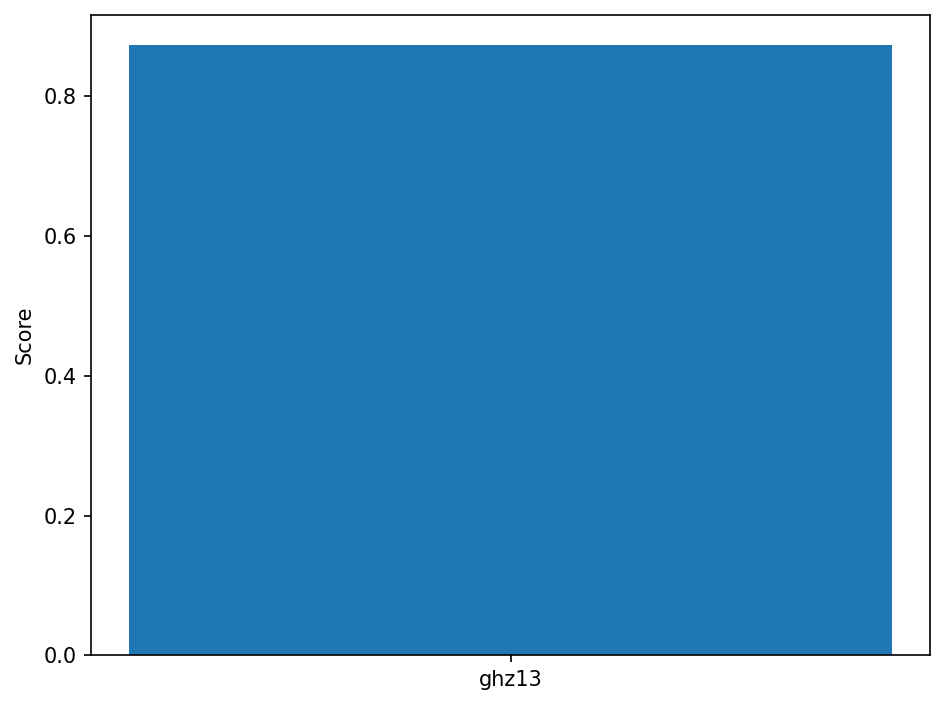

-----------------------------------------------------------
USED BACKEND:: fake_oslo ; CIRCUIT_NAME: ghz15 ; SCORE = 0.8719713293325605


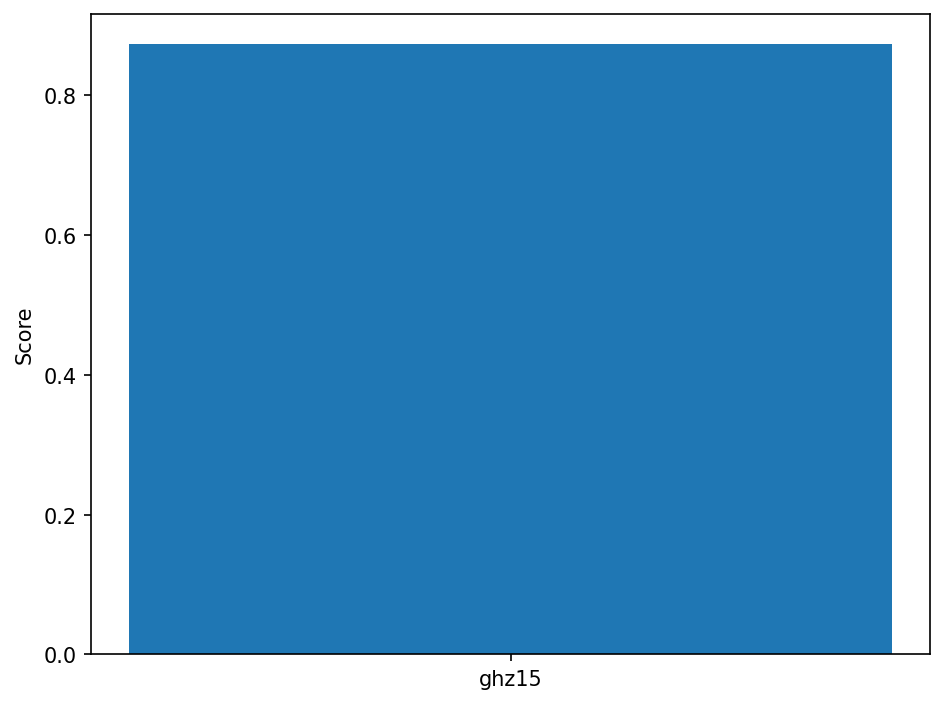

-----------------------------------------------------------
USED BACKEND:: fake_poughkeepsie ; CIRCUIT_NAME: ghz3 ; SCORE = 0.8197114367903224


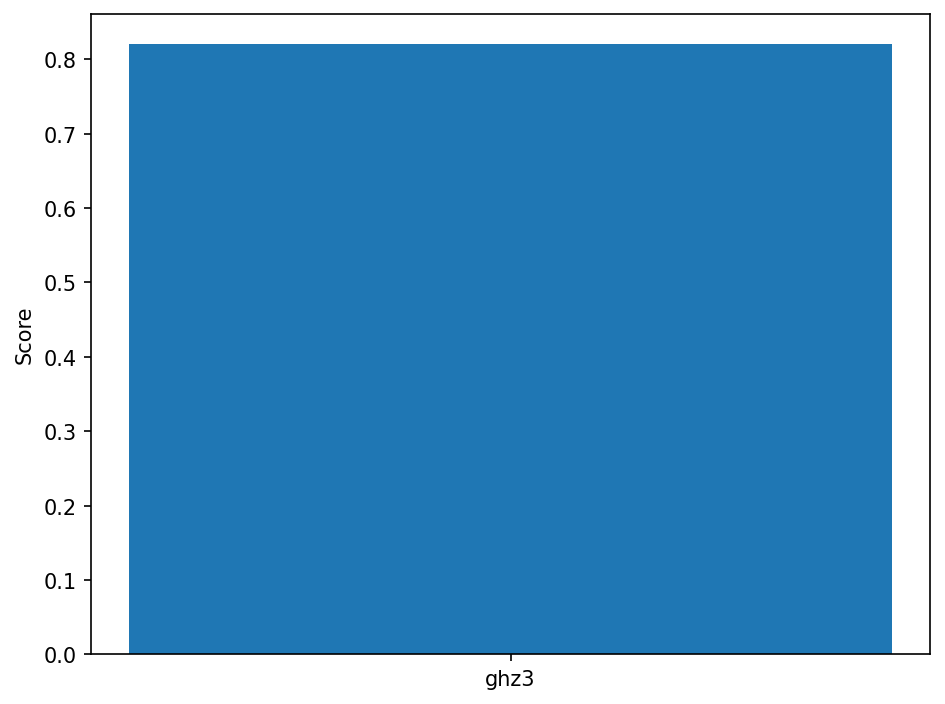

-----------------------------------------------------------
USED BACKEND:: fake_poughkeepsie ; CIRCUIT_NAME: ghz5 ; SCORE = 0.6766699572067376


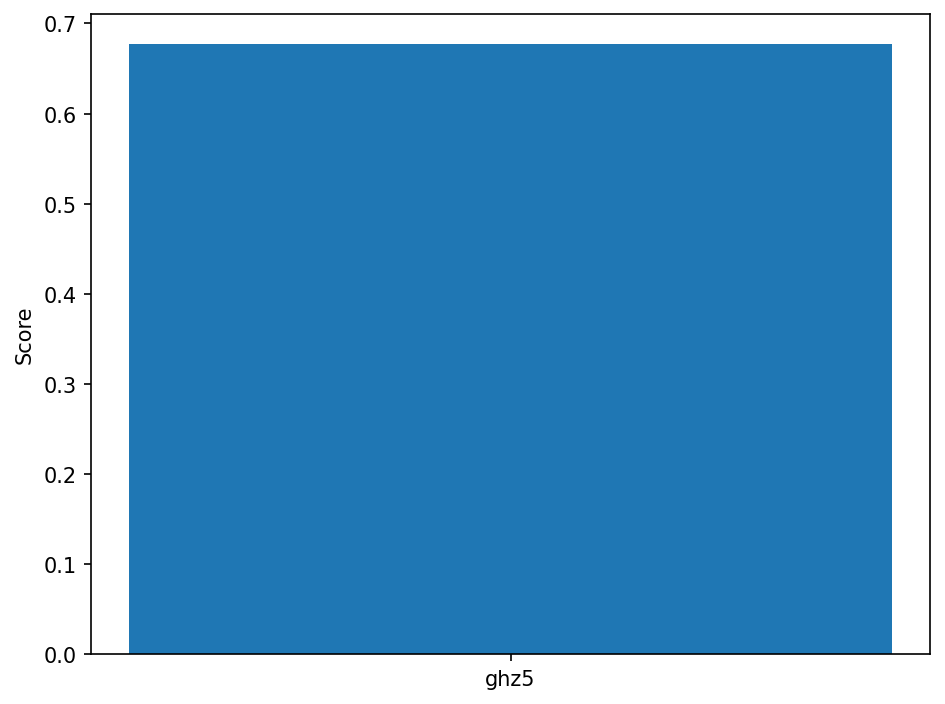

-----------------------------------------------------------
USED BACKEND:: fake_poughkeepsie ; CIRCUIT_NAME: ghz7 ; SCORE = 0.6499984520086745


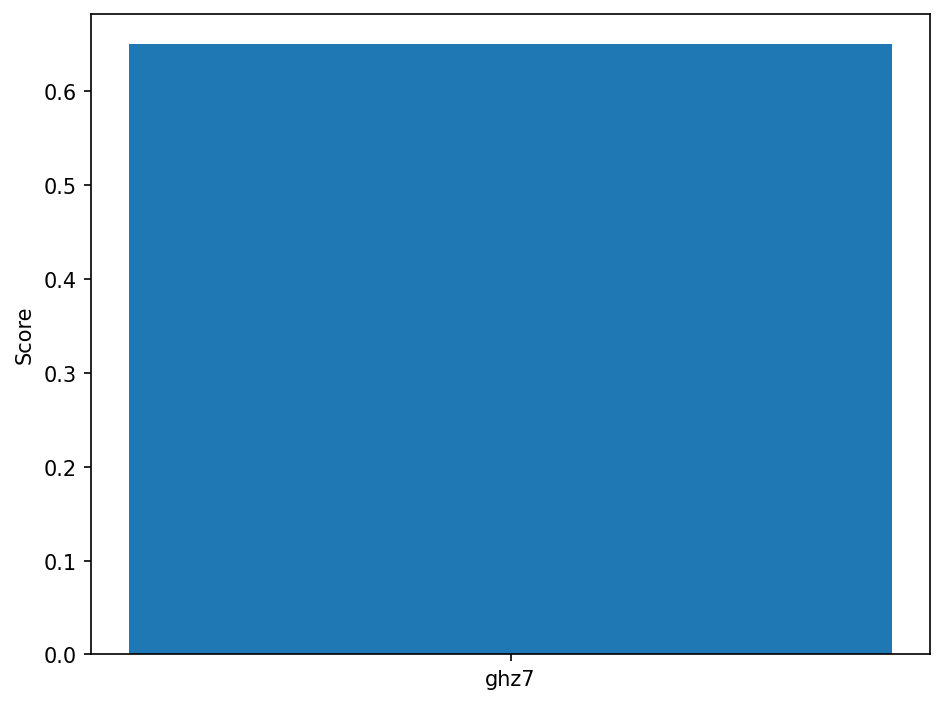

-----------------------------------------------------------
USED BACKEND:: fake_poughkeepsie ; CIRCUIT_NAME: ghz9 ; SCORE = 0.45155962487356516


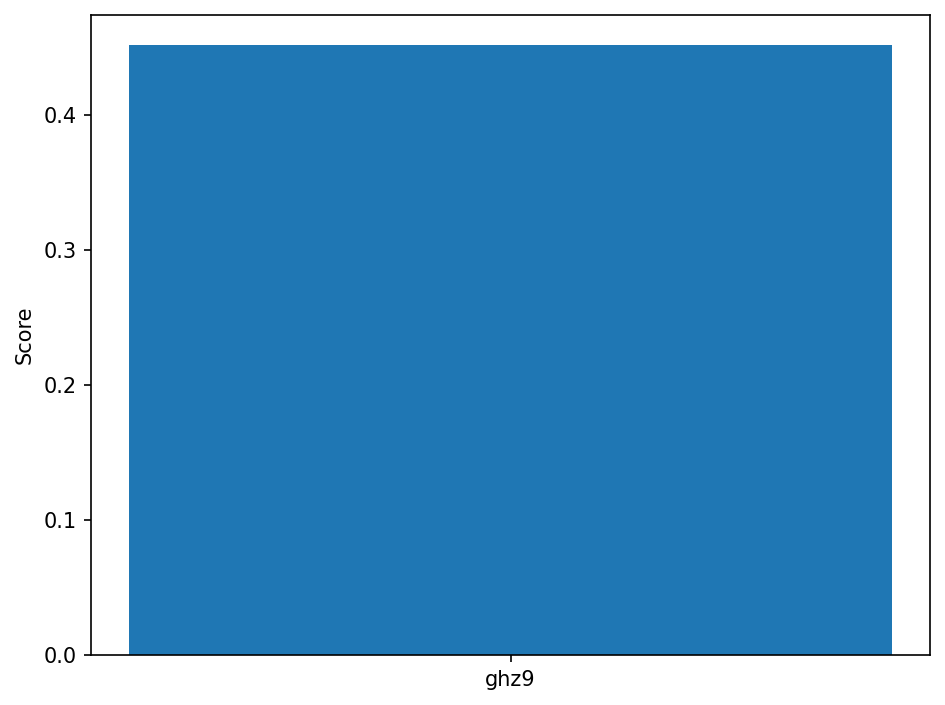

-----------------------------------------------------------
USED BACKEND:: fake_poughkeepsie ; CIRCUIT_NAME: ghz11 ; SCORE = 0.41563602910400704


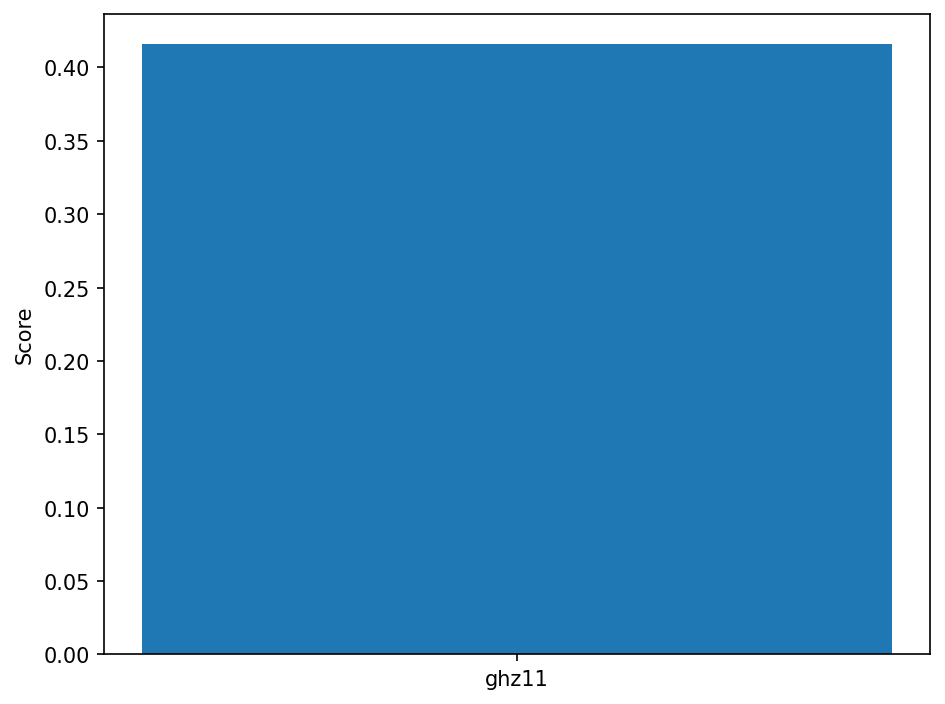

-----------------------------------------------------------
USED BACKEND:: fake_poughkeepsie ; CIRCUIT_NAME: ghz13 ; SCORE = 0.348527605024425


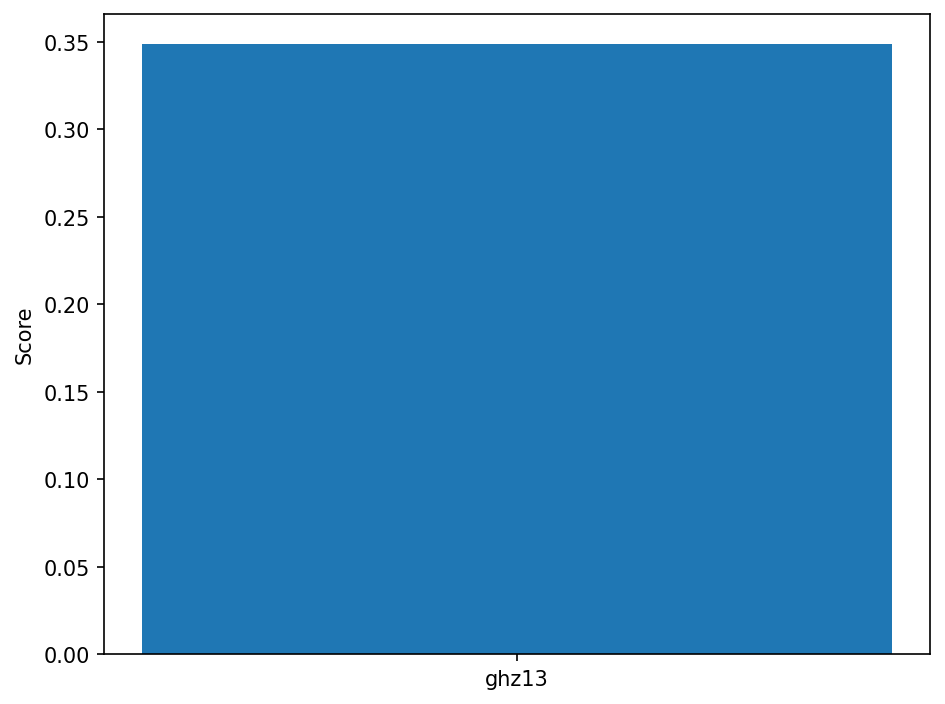

-----------------------------------------------------------
USED BACKEND:: fake_poughkeepsie ; CIRCUIT_NAME: ghz15 ; SCORE = 0.29314021704740856


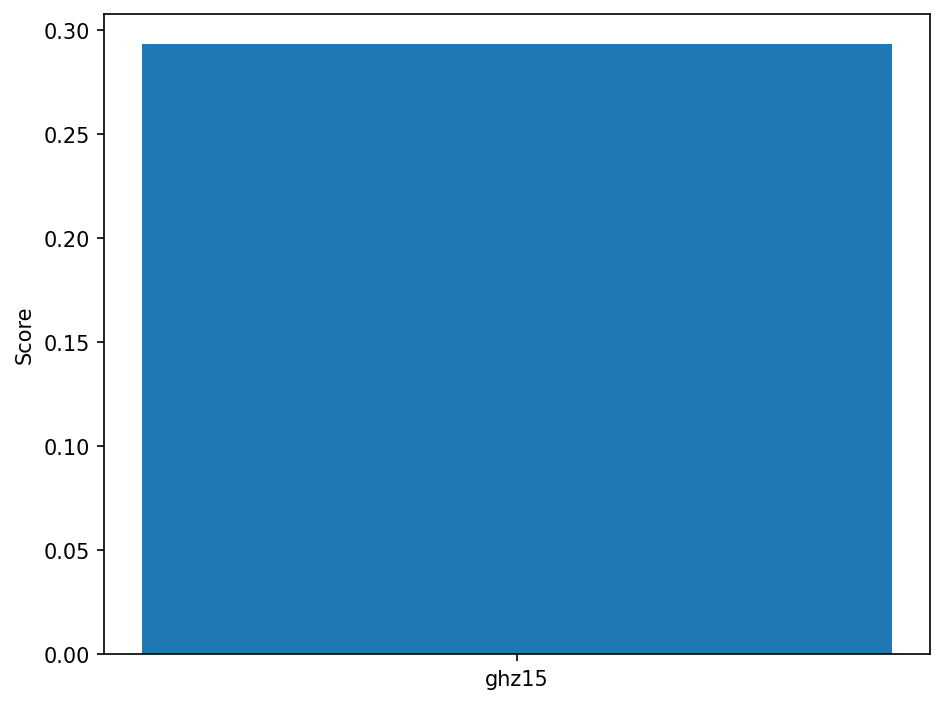

-----------------------------------------------------------


In [7]:
for label,benchmark,backend,job,score in jobs:
    print("USED BACKEND::",backend().name,"; CIRCUIT_NAME:",label, "; SCORE =",score)
    supermarq.plotting.plot_results([score], [label])
    print("-----------------------------------------------------------")

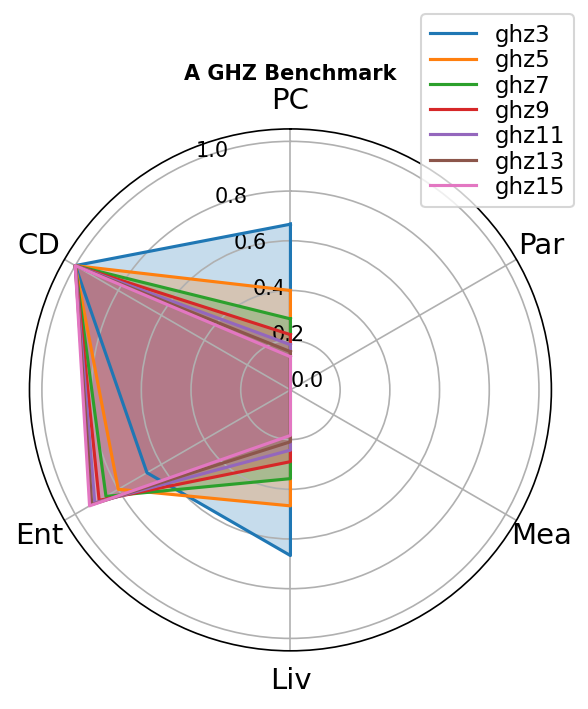

In [8]:
names=[]
scores=[]
for i,j in benchmark_features.items():
    names.append(i)
    scores.append(j)
supermarq.plotting.plot_benchmark(
        ["A GHZ Benchmark",['ghz3', 'ghz5', 'ghz7', 'ghz9', 'ghz11', 'ghz13', 'ghz15'],[[0.6666666666666666, 1.0, 0.6666666666666666, 0.6666666666666666, 0.0, 0], [0.4, 1.0, 0.8, 0.4666666666666667, 0.0, 0], [0.2857142857142857, 1.0, 0.8571428571428571, 0.35714285714285715, 0.0, 0], [0.2222222222222222, 1.0, 0.8888888888888888, 0.28888888888888886, 0.0, 0], [0.18181818181818182, 1.0, 0.9090909090909091, 0.24242424242424243, 0.0, 0], [0.15384615384615385, 1.0, 0.9230769230769231, 0.2087912087912088, 0.0, 0], [0.13333333333333333, 1.0, 0.9333333333333333, 0.18333333333333332, 0.0, 0]]],
        spoke_labels=["PC", "CD", "Ent", "Liv", "Mea", "Par"],
        show=True)

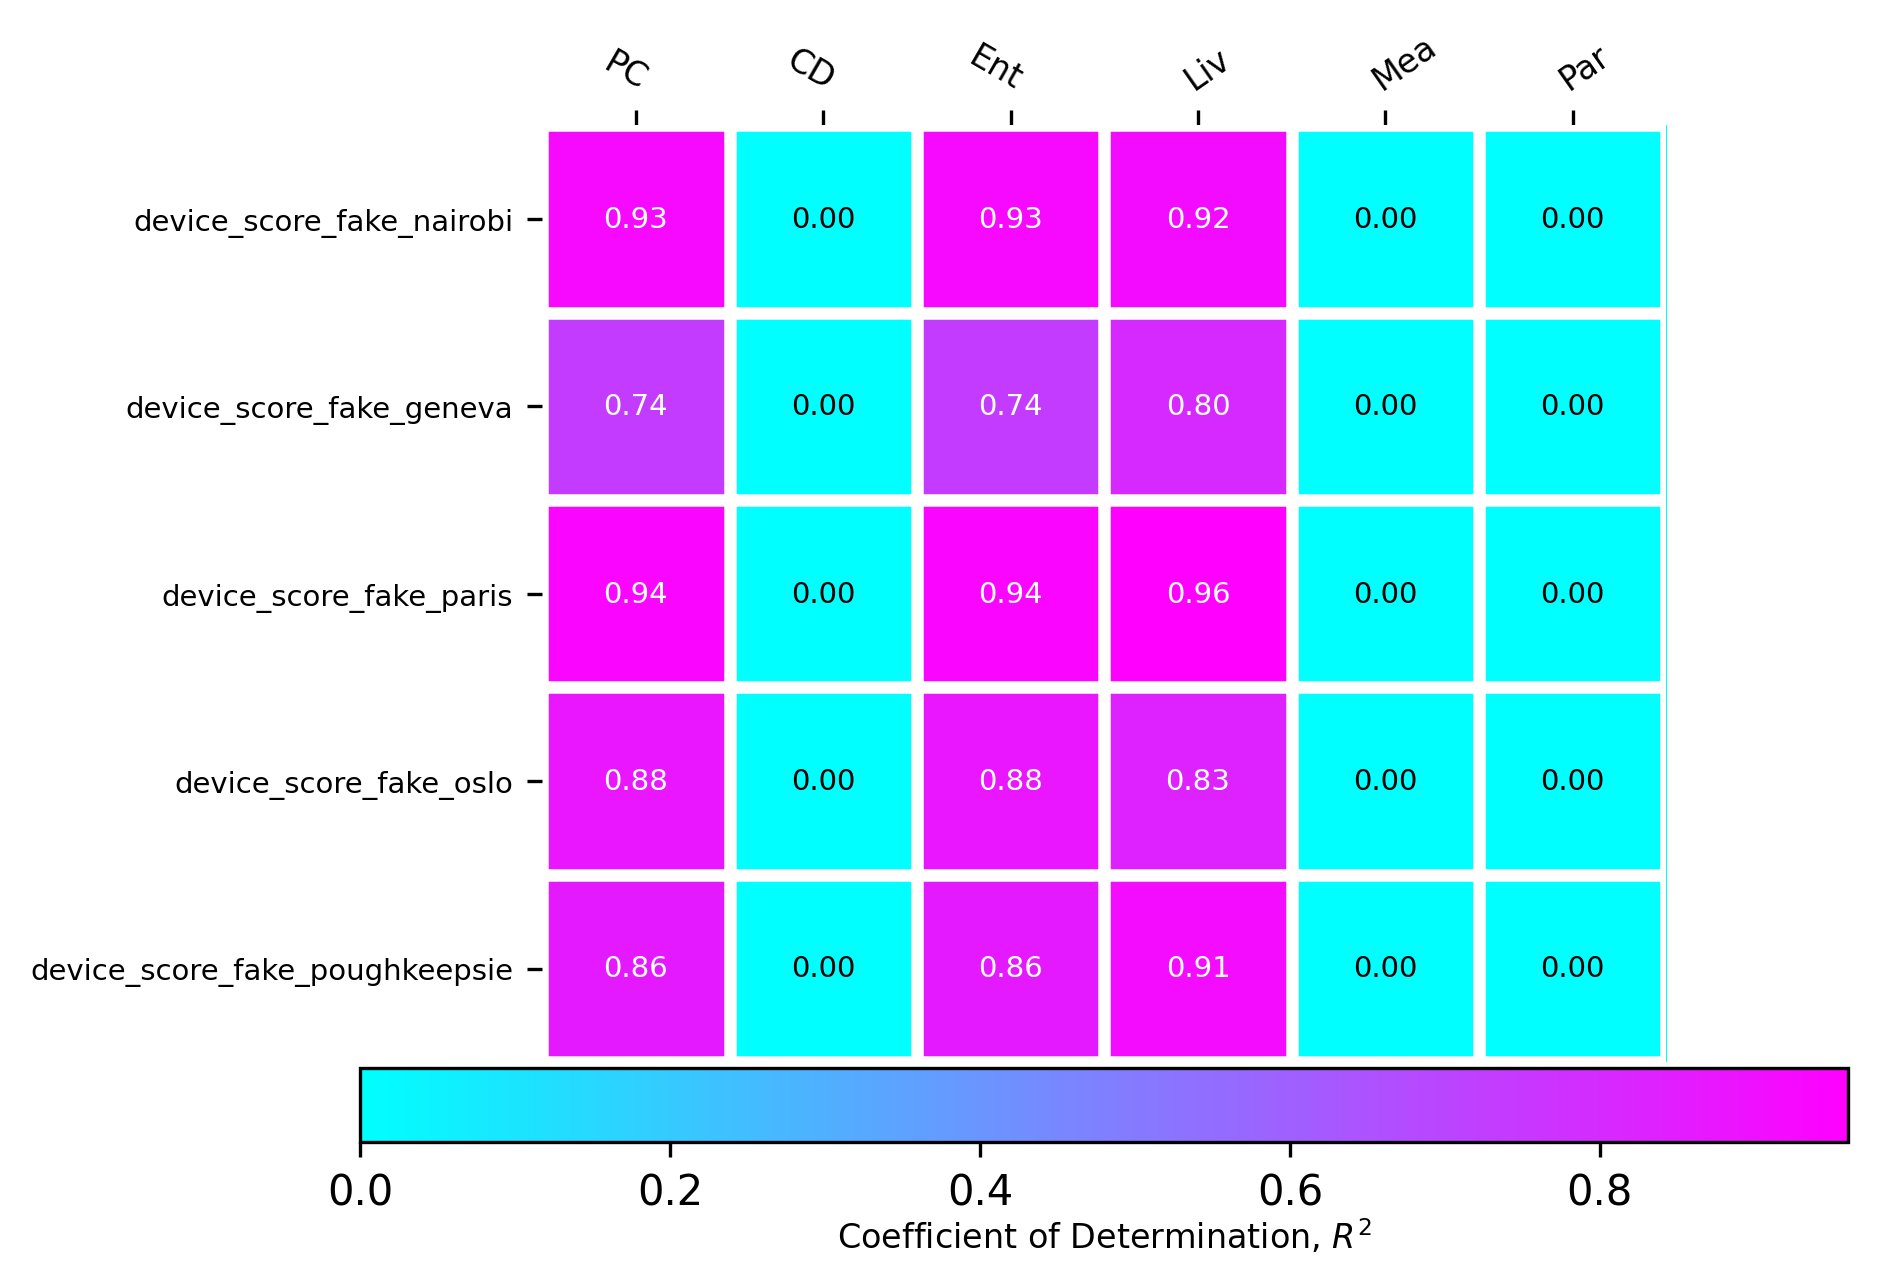

In [9]:
supermarq.plotting.plot_correlations(benchmark_features,all_fake_scores,["PC", "CD", "Ent", "Liv", "Mea", "Par"],device_name=all_fake_names,show=True,)

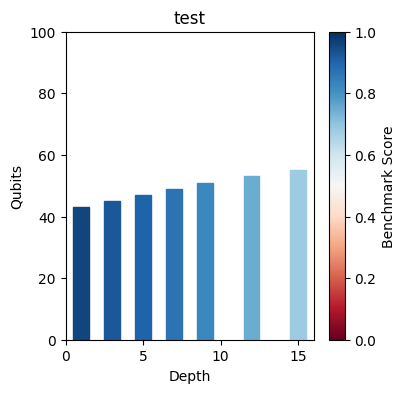

In [10]:
supermarq.plotting.plot_volumetric_results(
[(1.0,3,0.9578956044901644,),(3.0,5,0.9232678180840281,),(5.0,7,0.9039955751995808,),(7.0,9,0.8699816088066253,),(9.0,11, 0.8209119881290019,),(12.0,13,0.7484919785236042,),(15.0,15,0.682999633967593,)],
ymax=100,xmax=16,rect_width=1,rect_height=80,title="test",show=True,)

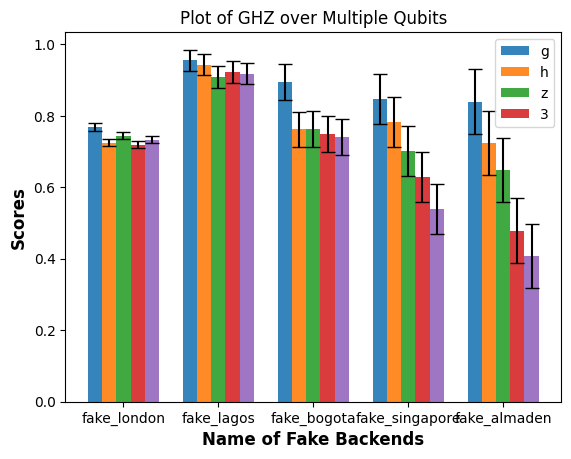

In [29]:
import matplotlib.pyplot as plt 
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
cm.get_cmap('plasma', 8)
import numpy as np
barWidth = 0.1
ghz3=[0.7684057902536163,0.9549557571126356,0.8948522102326085,0.8460399389406876,0.8396610265269924]
ghz5=[0.7242658520425679,0.9429870093650513,0.761457507502487,0.7834808179437962,0.7237894122615021]
ghz7=[0.7439672725086521,0.9078413819827363,0.7630574858020795,0.7019195186305425, 0.648]
ghz9=[0.7193128002182146,0.9224012909506764,0.747773995885214,0.6275763906631464,0.4783597915095799]
ghz11=[0.7327271701982083,0.9176850771498893,0.7399116741828125,0.5384494334138958,0.40647499843730456]
ghz13=[0.7334132269827757,0.9189866701004503,0.7375105154537656,0.4995901472816957,0.3779939677308625]
ghz15=[0.7290711759752141,0.9269220538558777,0.7206683705040073,0.4395632293192744,0.3297894990529]
error=[[0.01, 0.03, 0.05,0.07,0.09]]
categories= ['fake_london','fake_lagos','fake_bogota','fake_singapore','fake_almaden']
data=[ghz3,ghz5,ghz7,ghz9,ghz11,ghz13,ghz15]
errors=[error,error,error,error,error,error,error]
num_bars = len(data[0])
width = 0.15
# Create x-axis positions for each bar
x = np.arange(len(categories))
fig, ax = plt.subplots()
# Create bars for each category with appropriate offsets
for i in range(num_bars):
    color = cmap(i/num_bars)
    ax.bar(x + i * width, data[i], width=width, label=f'Bar {i+1}', 
           yerr=errors[i],align='center',alpha=0.9,ecolor='black',
           capsize=5)
# Add labels and title
ax.set_xlabel('Name of Fake Backends',
              fontweight ='bold',
              fontsize = 12)
ax.set_ylabel('Scores',
              fontweight ='bold',
              fontsize = 12)
ax.set_title('Plot of GHZ over Multiple Qubits')
ax.set_xticks(x + (num_bars - 1) * width / 2)
ax.set_xticklabels(categories)
ax.legend("ghz3")
#ax.grid(True)
plt.show()

In [30]:
data

[[0.7684057902536163,
  0.9549557571126356,
  0.8948522102326085,
  0.8460399389406876,
  0.8396610265269924],
 [0.7242658520425679,
  0.9429870093650513,
  0.761457507502487,
  0.7834808179437962,
  0.7237894122615021],
 [0.7439672725086521,
  0.9078413819827363,
  0.7630574858020795,
  0.7019195186305425,
  0.648],
 [0.7193128002182146,
  0.9224012909506764,
  0.747773995885214,
  0.6275763906631464,
  0.4783597915095799],
 [0.7327271701982083,
  0.9176850771498893,
  0.7399116741828125,
  0.5384494334138958,
  0.40647499843730456],
 [0.7334132269827757,
  0.9189866701004503,
  0.7375105154537656,
  0.4995901472816957,
  0.3779939677308625],
 [0.7290711759752141,
  0.9269220538558777,
  0.7206683705040073,
  0.4395632293192744,
  0.3297894990529]]

In [ ]:
list1=[]
list1=jobs[0]
for label,ckt,backend,job,score in jobs:
    fakes=backend().name
    #print(jobs[0])
#list1
#print(len(jobs))  # = 35 = (7 ckt* 5 backends)

for fakes in all_fake_scores:
    print(fakes)
    #for i in range(len(jobs)):
        #print(jobs[i])

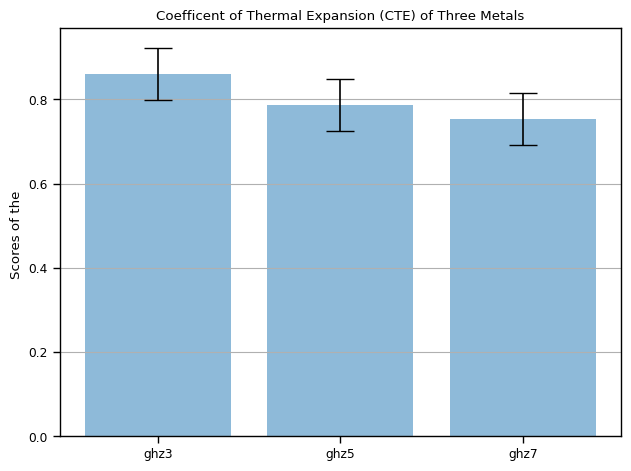

In [37]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
ghz3=np.array([0.7684057902536163,0.9549557571126356,0.8948522102326085,0.8460399389406876,0.8396610265269924])
ghz5=np.array([0.7242658520425679,0.9429870093650513,0.761457507502487,0.7834808179437962,0.7237894122615021])
ghz7=np.array([0.7439672725086521,0.9078413819827363,0.7630574858020795,0.7019195186305425, 0.648])
ghz9=[0.7193128002182146,0.9224012909506764,0.747773995885214,0.6275763906631464,0.4783597915095799]
ghz11=[0.7327271701982083,0.9176850771498893,0.7399116741828125,0.5384494334138958,0.40647499843730456]
ghz13=[0.7334132269827757,0.9189866701004503,0.7375105154537656,0.4995901472816957,0.3779939677308625]
ghz15=[0.7290711759752141,0.9269220538558777,0.7206683705040073,0.4395632293192744,0.3297894990529]
# Calculate the mean
ghz3_mean = np.mean(ghz3)
ghz5_mean = np.mean(ghz5)
ghz7_mean = np.mean(ghz7)
# Calculate the standard deviation
ghz3_std = np.std(ghz3)
ghz5_std = np.std(ghz5)
ghz7_std = np.std(ghz7)
# Define labels, positions, bar heights and error bar heights
labels = ['ghz3', 'ghz5', 'ghz7']
x_pos = np.arange(len(labels))
CTEs = [ghz3_mean, ghz5_mean, ghz7_mean]
error = [ghz3_std, ghz3_std, ghz3_std]
# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('Scores of the ')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Coefficent of Thermal Expansion (CTE) of Three Metals')
ax.yaxis.grid(True)
# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

In [14]:
print(ghz3_std,ghz5_std,ghz7_std,ghz3_mean,ghz5_mean,ghz7_mean)

0.06201010201793609 0.0811513525004348 0.08693998291859939 0.8607829446133082 0.7871961198230808 0.7529571317848022


In [32]:
import seaborn as sns
sns.set_context('paper')
tips = sns.load_dataset('tips')

In [33]:
tips


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
